# Implement Tweet2Vec from Dhingra et al.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
np.random.seed(13)

In [3]:
from keras.models import Model
from keras.layers import Dense, Embedding, GRU, Input, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.regularizers import l2
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [4]:
from IPython.display import SVG
from matplotlib import pyplot as plt
plt.style.use("ggplot")

In [5]:
#tweets.tsv is in the format of <tweet text><tab><hashtag_id> where hashtag_id is a unique id given to each hashtag

tweets = []
labels = []
with open("./../data/tweets.tsv") as f:
    for l in f:
        tweet, label = l.strip().split("\t")
        tweets.append(" ".join(list(tweet)))
        labels.append(int(label))


In [6]:
maxlen = 140

tokenizer = Tokenizer(filters="")
tokenizer.fit_on_texts(tweets)
X_train = tokenizer.texts_to_sequences(tweets)
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
#Y_train = np_utils.to_categorical(labels, len(set(labels)))
Y_train = np_utils.to_categorical(labels, len(set(labels)))
V = len(tokenizer.word_index) + 1

In [7]:
Y_train.shape

(3, 3)

/Users/admin/.virtualenvs/Representation-Learning-for-NLP/lib/python2.7/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(30, 128, embeddings_regularizer=<keras.reg..., input_length=140)`
  '` call to the Keras 2 API: ' + signature)
/Users/admin/.virtualenvs/Representation-Learning-for-NLP/lib/python2.7/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(128, recurrent_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg..., return_sequences=False)`
  '` call to the Keras 2 API: ' + signature)
/Users/admin/.virtualenvs/Representation-Learning-for-NLP/lib/python2.7/site-packages/keras/legacy/interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="softmax", kernel_regularizer=<keras.reg...)`
  '` call to the Keras 2 API: ' + signature)
/Users/admin/.virtualenvs/Representation-Learning-for-NL

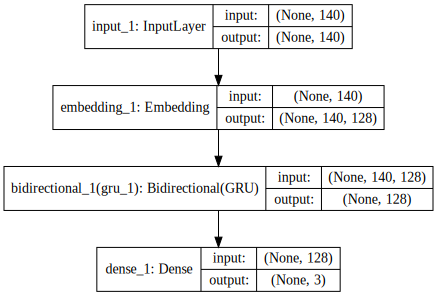

In [8]:
l2_coef = 0.001
tweet = Input(shape=(maxlen,), dtype='int32')
x = Embedding(V, 128, input_length=maxlen, W_regularizer=l2(l=l2_coef))(tweet)
x = Bidirectional(layer=GRU(128, return_sequences=False, 
                            W_regularizer=l2(l=l2_coef),
                            b_regularizer=l2(l=l2_coef),
                            U_regularizer=l2(l=l2_coef)),
                  merge_mode='sum')(x)
x = Dense(len(set(labels)), W_regularizer=l2(l=l2_coef), activation="softmax")(x)

tweet2vec = Model(input=tweet, output=x)

tweet2vec.compile(loss='categorical_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])

SVG(model_to_dot(tweet2vec, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
tweet2vec.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)

Train on 2 samples, validate on 1 samples
Epoch 1/10
2/2 [==============================] - 0s - loss: 0.6942 - acc: 1.0000 - val_loss: 4.3632 - val_acc: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s - loss: 0.5737 - acc: 1.0000 - val_loss: 4.3250 - val_acc: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s - loss: 0.5458 - acc: 1.0000 - val_loss: 4.3640 - val_acc: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s - loss: 0.5263 - acc: 1.0000 - val_loss: 4.4369 - val_acc: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s - loss: 0.5108 - acc: 1.0000 - val_loss: 4.5276 - val_acc: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s - loss: 0.4977 - acc: 1.0000 - val_loss: 4.6281 - val_acc: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s - loss: 0.4862 - acc: 1.0000 - val_loss: 4.7335 - val_acc: 0.0000e+00
Epoch 8/10
2/2 [==============================] - 0s - loss: 0.4757 - acc: 1.0000 - val_loss: 4.8